# 從 url 直接下載檔案

In [3]:
import requests

url = "https://opendata.epa.gov.tw/ws/Data/ATM00625/?$format=json"
res = requests.get(url)
print(res.text)

with open("D:\\pm25.json", 'wb') as f:
    f.write(res.content)


# 避免蓋掉舊檔，用時間做檔名

%a 本地簡化星期名稱  
%A 本地完整星期名稱  
%b 本地簡化的月份名稱  
%B 本地完整的月份名稱  
%c 本地相應的日期表示和時間表示  
** %d 月內中的一天（0-31）**  
** %H 24小時制小時數（0-23）**  
%I 12小時制小時數（01-12）  
%j 年內的一天（001-366）  
** %m 月份（01-12）**  
** %M 分鐘數（00=59）**  
%p 本地A.M.或P.M.的等價符  
** %S 秒（00-59）**  
%U 一年中的星期數（00-53）星期天為星期的開始  
%w 星期（0-6），星期天為星期的開始  
%W 一年中的星期數（00-53）星期一為星期的開始  
%x 本地相應的日期表示  
%X 本地相應的時間表示  
%y 兩位數的年份表示（00-99）  
** %Y 四位數的年份表示（000-9999）**  
%Z 當前時區的名稱  
%% %號本身  

In [2]:
import requests, time
from datetime import datetime

現在 = datetime.now()
print(現在)
ftime = 現在.strftime("%Y%m%d_%H%M%S")
print("時間格式化", ftime)

with open("D:\\pm25_"+ftime+".json", 'wb') as f:
    #f.write(res.content)
    f.write(b"xxxxxx")
    print("寫入完成", 現在)



2020-03-09 10:32:35.951997
時間格式化 20200309_103235
寫入完成 2020-03-09 10:32:35.951997


# 每隔幾分鐘抓一次，並新增一個檔案

In [ ]:
import requests, time
from datetime import datetime

while True:
    url = "https://opendata.epa.gov.tw/ws/Data/ATM00625/?$format=json"
    res = requests.get(url)
    print(res.text)

    現在 = datetime.now()
    ftime = 現在.strftime("%Y%m%d_%H%M%S")
    print("時間格式化", ftime)

    with open("D:\\pm25_"+ftime+".json", 'wb') as f:
        #f.write(res.content)
        f.write(res.content)
        print("寫入完成", 現在)

    time.sleep(60*5)

# 還是有問題: 雖然每隔 5 分鐘執行一次，但是，執行需要花時間的，尤其抓外網的資料，動輒花費幾十秒。那實際上後面時間誤差就會越來越大。

## 解法: sleep 的時間扣掉執行的時間。

In [ ]:
import requests, time
from datetime import datetime

while True:
    start = datetime.now()
    url = "https://opendata.epa.gov.tw/ws/Data/ATM00625/?$format=json"
    res = requests.get(url)
    print(res.text)

    現在 = datetime.now()
    ftime = 現在.strftime("%Y%m%d_%H%M%S")
    print("時間格式化", ftime)

    with open("D:\\pm25_"+ftime+".json", 'wb') as f:
        #f.write(res.content)
        f.write(res.content)
        print("寫入完成", 現在)
    td = datetime.now() - start
    print("花費", td.seconds, "秒")
    time.sleep(60*5-td.seconds)

# 時間戳記用 "現在" 合理嗎? 是不是可以用這批資料更新的時間來當作時間戳記呢?

## 由字串轉時間物件

    parse
    
    datetime.strptime("時間字串", "時間格式")
    
    # 範例
    datetime.strptime("03-09-2020 11:00", "%m-%d-%Y %H:%M")
    datetime.strptime("2020-03-09 11:00", "%Y-%m-%d %H:%M")
    datetime.strptime("2020-03-09 11:00:00", "%Y-%m-%d %H:%M:%S")
    datetime.strptime("20200309110000", "%Y%m%d%H%M%S")


In [ ]:
import requests, time
from datetime import datetime

while True:
    start = datetime.now()
    url = "https://opendata.epa.gov.tw/ws/Data/ATM00625/?$format=json"
    
    try:
        res = requests.get(url)
    except:
        print('ffffff')
        time.sleep(10)
        continue

    datas = res.json()
    creationDate = datetime.strptime(datas[0]['DataCreationDate'], "%Y-%m-%d %H:%M")
    ftime = creationDate.strftime("%Y%m%d%H%M")
    with open("D:\\pm25_"+ftime+".json", 'wb') as f:
        f.write(res.content)

    td = datetime.now() - start
    print("花費", td.seconds, "秒")
    time.sleep(60*30-td.seconds)

# 如果網路不穩或者資料主機暫時出錯，該如何確保可以繼續抓下去?

    這裡是進行例外處理的語法
    
    try:
        xxxxx
    except:
        xxxxx
       


In [3]:
import requests
url = "https://opendataxxxxx.epa.gov.tw/ws/Data/ATM00625/?$format=json"
try:
    res = requests.get(url)
    print(res.text)
except:
    print('糟糕，網站連不上!!')


糟糕，網站連不上!!


# 取出某測站一整天的數值

依據檔名規則取得每個時間點的數值

In [13]:
import requests, time, json, sys, os
from datetime import datetime, timedelta

start = datetime(2020, 3, 17, 0, 0)

print("時, PM2.5")
for i in range(24):
    ftime = start.strftime("%Y%m%d%H%M")
    filename = os.path.join(os.getcwd(), 'datas', 'pm25', f'pm25_{ftime}.json')
    #filename = 'D:\\'+f'pm25_{ftime}.json'
    try:
        with open(filename, 'r', encoding='UTF-8') as f:
            datas = json.loads(f.read())
            print(start.strftime("%H")+", ", datas[7]['PM25'])
    except:
        print(filename, sys.exc_info())

    start = start + timedelta(hours=1) 


時, PM2.5
00,  28
01,  25
02,  26
03,  22
04,  24
05,  27
06,  27
07,  29
08,  37
09,  36
10,  22
11,  19
12,  16
13,  14
14,  
15,  19
16,  18
17,  16
18,  15
19,  17
20,  21
21,  18
22,  24
23,  21


# 測站資料直接存入 excel

使用 pandas 套件

    pip install pandas

In [17]:
import requests, time, json
from datetime import datetime, timedelta
import pandas as pd

start = datetime(2020, 3, 8, 0, 0)

df = pd.DataFrame()

#print("時, "+datas[7]['Site'])

col1 = []
col2 = []
for i in range(24):
    ftime = start.strftime("%Y%m%d%H%M")
    filename = f"D:\\pm25_{ftime}.json"
    try:
        with open(filename, 'r', encoding="UTF-8") as f:
            datas = json.loads(f.read())
            #print(start.strftime("%H")+"\t"+datas[7]['PM25'])
            col1.append(start.strftime("%H"))
            col2.append(int(datas[7]['PM25']))
    except e:
        print(filename, e)

    start = start + timedelta(hours=1) 
    
df['時'] = pd.Series(col1)
df[datas[7]['Site']] = pd.Series(col2)

df.to_excel('D:\\pm25.xlsx')
df

時, 復興


,時,復興
0,00,23
1,01,21
2,02,20
3,03,26
4,04,24
5,05,21
6,06,27
7,07,31
8,08,28
9,09,29


# 多個測站比較

In [7]:
import requests, time, json
from datetime import datetime, timedelta
import pandas as pd

start = datetime(2020, 3, 8, 0, 0)

df = pd.DataFrame()

print(f"時, {datas[7]['Site']}, {datas[8]['Site']}")

col1 = []
col2 = []
col3 = []
for i in range(24):
    ftime = start.strftime("%Y%m%d%H%M")
    filename = f"D:\\pm25_{ftime}.json"
    try:
        with open(filename, 'r', encoding="UTF-8") as f:
            datas = json.loads(f.read())
            print(start.strftime("%H")+", "+datas[7]['PM25']+", "+datas[8]['PM25'])
            col1.append(start.strftime("%H"))
            col2.append(int(datas[7]['PM25']))
            col3.append(int(datas[8]['PM25']))
    except e:
        print(filename, e)

    start = start + timedelta(hours=1) 
    
df['時'] = pd.Series(col1)
df[datas[7]['Site']] = pd.Series(col2)
df[datas[8]['Site']] = pd.Series(col3)

df.to_excel('D:\\pm25.xlsx')
df

時, 復興, 永和
00, 23, 20
01, 21, 18
02, 20, 19
03, 26, 13
04, 24, 14
05, 21, 13
06, 27, 11
07, 31, 17
08, 28, 13
09, 29, 9
10, 30, 10
11, 33, 8
12, 25, 12
13, 22, 10
14, 19, 9
15, 23, 7
16, 19, 4
17, 13, 1
18, 12, 3
19, 15, 5
20, 15, 3
21, 15, 3
22, 18, 3
23, 21, 5


,時,復興,永和
0,00,23,20
1,01,21,18
2,02,20,19
3,03,26,13
4,04,24,14
5,05,21,13
6,06,27,11
7,07,31,17
8,08,28,13
9,09,29,9


# 直接將數據繪製成折線圖

復興 00,  28
復興 01,  25
復興 02,  26
復興 03,  22
復興 04,  24
復興 05,  27
復興 06,  27
復興 07,  29
復興 08,  37
復興 09,  36
復興 10,  22
復興 11,  19
復興 12,  16
復興 13,  14
c:\Users\user\Documents\PythonBasic\datas\pm25\pm25_202003171400.json (<class 'ValueError'>, ValueError("invalid literal for int() with base 10: ''",), <traceback object at 0x000002746F783B88>)
復興 15,  19
復興 16,  18
復興 17,  16
復興 18,  15
復興 19,  17
復興 20,  21
復興 21,  18
復興 22,  24
復興 23,  21


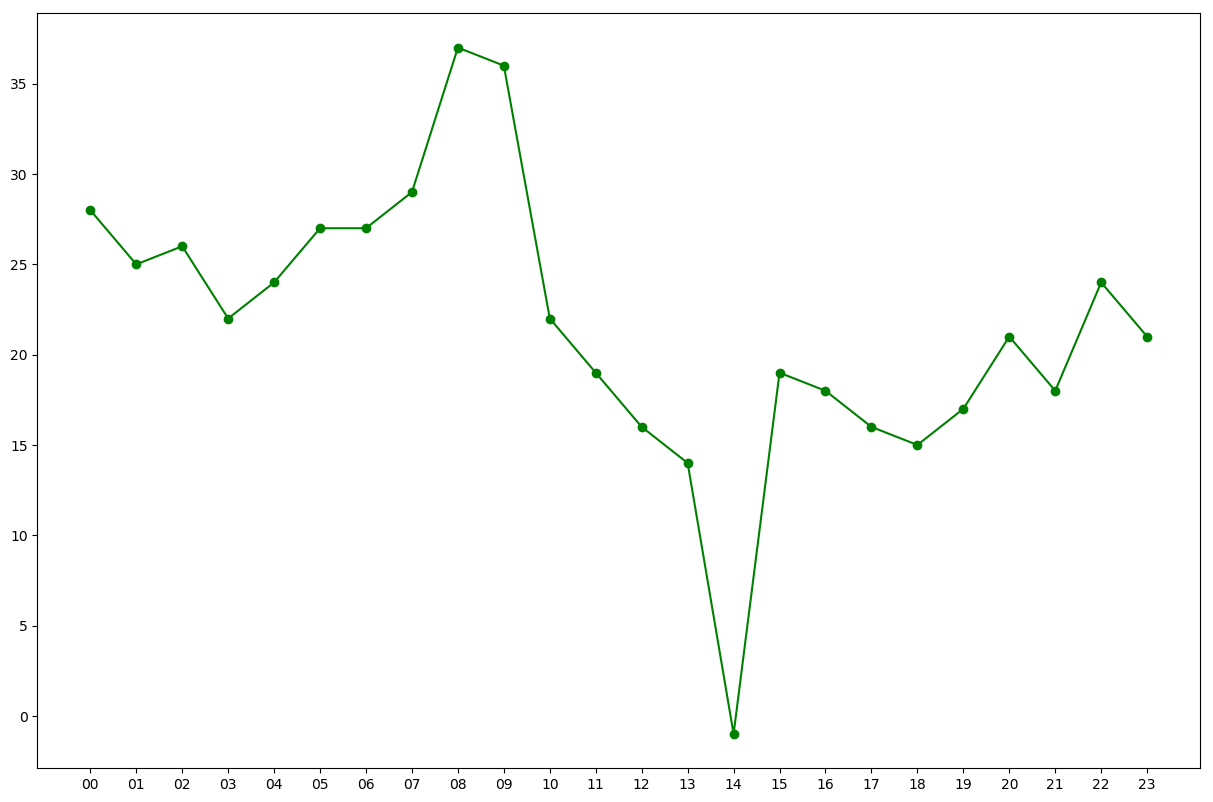

In [14]:
import requests, time, json, sys, os
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
#%matplotlib inline

start = datetime(2020, 3, 17, 0, 0)

axis_x = []
axis_y = []
for i in range(24):
    ftime = start.strftime("%Y%m%d%H%M")
    filename = os.path.join(os.getcwd(), "datas", "pm25", f"pm25_{ftime}.json")
    try:
        with open(filename, 'r', encoding="UTF-8") as f:
            datas = json.loads(f.read())
            axis_x.append(start.strftime("%H"))
            axis_y.append(int(datas[7]['PM25']))
            print(datas[7]['Site'], start.strftime("%H")+", ", datas[7]['PM25'])
    except:
        print(filename, sys.exc_info())
        axis_y.append(-1)

    start = start + timedelta(hours=1) 

plt.figure(figsize=(15,10),dpi=100,linewidth = 2)
try:
    plt.plot(axis_x,axis_y,'o-',color = 'g', label="PM25")
except:
    print(sys.exc_info()[0])
    pass